In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization,Activation
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from keras.models import load_model
import h5py
from keras.utils.io_utils import HDF5Matrix

Using TensorFlow backend.


### Analisando a base de dados

Machine Learning (ML), de forma geral, é uma técnica que extrai padrões a partir de dados. Dessa forma, antes de aplicar um algoritmo de ML (assim como Deep Learning), torna-se necessário inicialmente coletando, organizando e analisando a base de dados, conforme indicado na Figura abaixo.   

![alt text](imgs/herarchy_needs.png "Title")

Dessa forma, precisamos conhecer a base de dados do problema. Para esse notebook, utilizaremos a base [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html). Essa base contém 60.000 imagens e 10 classes, cada classe possuindo 6.000 amostras.

A figura abaixo exemplifica 10 imagens de cada classe (avião, automóveis, pássaro, sapo, garro, veado, caminhão, cachorro, cavalo e navio) e cada imagem possui dimensão 32x32x3 (largura x altura x canais de cor RGB).

![alt text](imgs/cifar10.png "Title")

## Coletando e visualizando imagens do dataset

O CIFAR10 está disponível no [pacote "datasets"](https://keras.io/datasets/) da API Keras. Pode-se coletar o dataset através da função load_data. Essa função retorna quatro estruturas:
* x_train: um array numpy ndimensional contendo as imagens de treinamento;
* y_train: um vetor numpy contendo os rótulos de cada imagem. Os rótulos são numéricos (0 a 9) e correspondentes às classes indicadas previamente. O tamanho do vetor y_train deverá ser o mesmo da quantidade de imagens armazenadas em x_train;
* x_test: um array numpy ndimensional contendo as imagens de teste;
* y_test: um vetor numpy contendo os rótulos de cada imagem. Os rótulos são numéricos (0 a 9) e correspondentes às classes indicadas previamente. O tamanho do vetor y_test deverá ser o mesmo da quantidade de imagens armazenadas em x_test;

Para visualizar as imagens, podemos acessar x_train ou x_test indexando o número da amostra desejada (e.g. x_train[0] acessa a imagem 0 do dataset). O matplotlib é uma biblioteca Python muito utilizada para visualização de imagens e gráficos

## Treinamento e teste?

Para um modelo Deep Learning aprender padrões, existe uma etapa chamada treinamento, em que através de n interações, o algoritmo analisa um set de imagens. Ao fim do set (epoch), o modelo é validado a partir de um segundo set de imagens conhecido como base de validação. Se o modelo retornar boa performance na base de validação, então o algoritmo estará aprendendo corretamente. Esse processo é repetido por uma quantidade de epochs definida pelo usuário ou até o momento em que o modelo não apresente melhorias (early stopping), finalizando o treinamento.

Quando o treinamento termina, tem-se uma terceira base, conhecida como base de teste, que irá avaliar a performance real do modelo. Essa base contém imagens que nunca foram apresentadas a rede. Em geral, a divisão entre as três bases é feita de forma que o treinamento contenha uma quantidade considerável de imagens (por exemplo 75%), enquanto validação e teste possuem uma quantidade reduzida (por exemplo, 15%).

![alt text](imgs/treino_teste.png "Title")

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

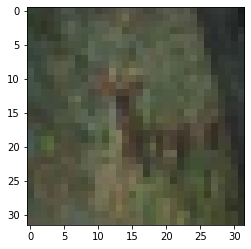

In [3]:
plt.imshow(x_train[10])

### Explorando o dataset

Uma vez coletado, é importante analisar as imagens por classe. O CIFAR10 contém 6.000 amostras por classe ao todo (considerando imagens de treino e teste). Dessa forma, podemos verificar quantas imagens existem para o treino e para o teste individualmente. Isso pode ser realizado através da função unique do numpy que, ao passar como parâmetro o vetor y_train, a função retorna a quantidade de amostras por classe. Feito isso, podemos apenas plotar um histograma com essas amostras. 

No gráfico abaixo, verificamos que para o treinamento, cada classe possui 5.000 amostras. Em datasets, é comum a quantidade de amostras encontrar-se desbalanceada, podendo adotar estratégias de balanceamento da mesma.

In [4]:
unique, counts = np.unique(y_train, return_counts=True)

<BarContainer object of 10 artists>

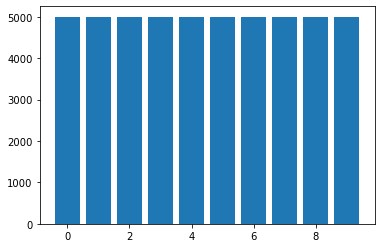

In [5]:
plt.bar(height=counts, x=unique)

### Implementando uma Rede Convolucional no Keras

Implementação de um modelo básico no Keras é dependente de quatro etapas principais:
* Sequential(): cria um objeto para o modelo, sendo este objeto sequencial. Isso significa dizer que cada camada será utilizada pelo modelo na ordem que for adicionada ao mesmo;
* add(): adiciona uma camada ou operação ao modelo. 
* compile: inclui informações como função de perda, otimizador e métrica de avaliação
* fit: realiza o treinamento, possuindo parâmetros como as bases de treino e validação, epochs e tamanho do batch.

Para essa atividade, iniciaremos com um modelo de três camadas convolutionais. Essas camadas possuem respectivamente 32,64 e 128 filtros de dimensão 5x5. Utilizaremos também função de ativação 'relu' e padding.

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train/255, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_split=0.2,
          shuffle=True)

W0923 10:17:02.890629  9312 deprecation_wrapper.py:119] From C:\Users\cecilia.silva\AppData\Local\Continuum\miniconda3\envs\vsoft_cecilia\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0923 10:17:02.942007  9312 deprecation_wrapper.py:119] From C:\Users\cecilia.silva\AppData\Local\Continuum\miniconda3\envs\vsoft_cecilia\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 10:17:02.956967  9312 deprecation_wrapper.py:119] From C:\Users\cecilia.silva\AppData\Local\Continuum\miniconda3\envs\vsoft_cecilia\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0923 10:17:03.095158  9312 deprecation_wrapper.py:119] From C:\Users\cecilia.silva\AppData\Local\Continuum\miniconda3\envs\vsoft_cecilia\lib\site

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 365s 9ms/step - loss: 1.4576 - acc: 0.4729 - val_loss: 1.1765 - val_acc: 0.5815
Epoch 2/20
40000/40000 [==============================] - 360s 9ms/step - loss: 1.0127 - acc: 0.6440 - val_loss: 0.9564 - val_acc: 0.6684
Epoch 3/20
40000/40000 [==============================] - 358s 9ms/step - loss: 0.8082 - acc: 0.7180 - val_loss: 0.8804 - val_acc: 0.7031
Epoch 4/20
40000/40000 [==============================] - 358s 9ms/step - loss: 0.6510 - acc: 0.7729 - val_loss: 0.9225 - val_acc: 0.6879
Epoch 5/20
40000/40000 [==============================] - 358s 9ms/step - loss: 0.5122 - acc: 0.8215 - val_loss: 0.9394 - val_acc: 0.6961
Epoch 6/20
40000/40000 [==============================] - 2600s 65ms/step - loss: 0.3999 - acc: 0.8579 - val_loss: 1.0095 - val_acc: 0.7126
Epoch 7/20
40000/40000 [==============================] - 441s 11ms/step - loss: 0.3004 - acc: 0.8929 - val_loss: 1.1593

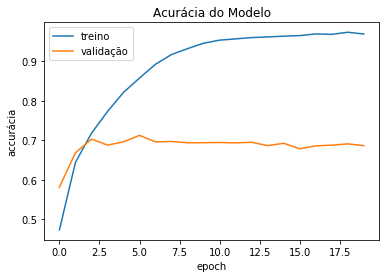

In [8]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Acurácia do Modelo')
plt.ylabel('accurácia')
plt.xlabel('epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

In [9]:
model.save('cifar_standard.h5')
saved_model = load_model('cifar_standard.h5')
saved_model.evaluate(x_test, y_test, verbose=0)

[6.477438083648682, 0.5965]

O modelo treinado possui uma acurácia de treinamento de 97.10% e 69.92% de validação utilizando o otimizador Adam. O Adam é um dos otimizadores mais utilizados, sendo a escolha do otimizador crucial para o treinamento do modelo. 

O GIF abaixo ilustra o comportamento de diferentes otimizadores. Para a curva específica representada no GIF, percebe-se que o SGD por exemplo possui desempenho inferior, assim como a percepção que determinados otimizadores alcançam o mesmo resultado, apesar de serem mais lentos. Dessa forma, podemos repetir o treinamento alterando-se apenas o otimizador e avaliar os resultados gerados.

![alt text](imgs/otimizadores.gif "Title")

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adadelta',
              metrics=['accuracy'])

hist = model.fit(x_train/255, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 480s 12ms/step - loss: 1.5348 - acc: 0.4486 - val_loss: 1.2507 - val_acc: 0.5611
Epoch 2/20
40000/40000 [==============================] - 451s 11ms/step - loss: 0.9974 - acc: 0.6498 - val_loss: 0.9483 - val_acc: 0.6742
Epoch 3/20
40000/40000 [==============================] - 403s 10ms/step - loss: 0.7478 - acc: 0.7401 - val_loss: 0.9669 - val_acc: 0.6716
Epoch 4/20
40000/40000 [==============================] - 367s 9ms/step - loss: 0.5602 - acc: 0.8069 - val_loss: 0.8841 - val_acc: 0.7218
Epoch 5/20
40000/40000 [==============================] - 433s 11ms/step - loss: 0.3891 - acc: 0.8654 - val_loss: 0.9274 - val_acc: 0.7320
Epoch 6/20
40000/40000 [==============================] - 407s 10ms/step - loss: 0.2456 - acc: 0.9165 - val_loss: 1.0473 - val_acc: 0.7205
Epoch 7/20
40000/40000 [==============================] - 430s 11ms/step - loss: 0.1490 - acc: 0.9497 - val_loss: 1.3

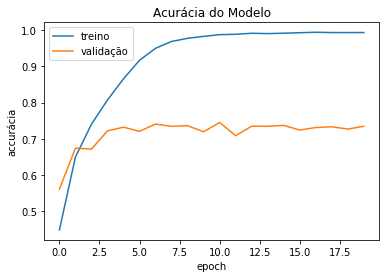

In [11]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Acurácia do Modelo')
plt.ylabel('accurácia')
plt.xlabel('epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

In [12]:
model.save('cifar_standard_adadelta.h5')
saved_model = load_model('cifar_standard_adadelta.h5')
saved_model.evaluate(x_test, y_test, verbose=0)

[5.549459395599365, 0.6546]

### Melhorando  o modelo: analisando Overfitting e Underfitting

Ao alterar o otimizador para 'Adadelta', percebemos que a acurácia de treinoo variou para 99.28% e validação 72.23%. Tivemos um desempenho melhor na base de validação assim, embora a diferença entre o desempenho de treino e validação tenha aumentado.

Em casos de treinamento que ocorrem essa diferença de acurácia, dizemos que ocorreu overfitting ou superajuste do modelo. Na prática, isso significa dizer que o modelo aprendeu muitos detalhes do dataset de treinamento, de forma que ao apresentar uma imagem com poucas variações em relação as imagens de treinamento, o modelo não possui um desempenho esperado. Graficamente, podemos visualizar a presença do overfitting na figura abaixo 

![alt text](imgs/overfiting_curve.png "Title")

Baseado nisso, existem algumas técnicas que podem melhorar a performance do modelo, sendo uma delas chamadas de técnica de regularização, como dropout e e normalização do batch.
Para adicioná-las no Keras, incluímos a chamada das funções dropout() e batchnormalization() no método add() do keras, da mesma forma que é realizado para adicionar camadas convolucionais e operação pooling.

O dropout possui um parâmetro p que determina a quantidade de neurônios que sreá utilizada. Nesse caso, indicamos que a rede utilizará 50% dos neurônios aleatoriamente.

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train/255, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_split=0.2,
          shuffle=True)

W0923 17:12:02.167542  9312 deprecation.py:506] From C:\Users\cecilia.silva\AppData\Local\Continuum\miniconda3\envs\vsoft_cecilia\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 506s 13ms/step - loss: 1.7970 - acc: 0.3370 - val_loss: 1.4521 - val_acc: 0.4721
Epoch 2/20
40000/40000 [==============================] - 491s 12ms/step - loss: 1.4814 - acc: 0.4627 - val_loss: 1.2767 - val_acc: 0.5487
Epoch 3/20
40000/40000 [==============================] - 458s 11ms/step - loss: 1.3622 - acc: 0.5095 - val_loss: 1.1513 - val_acc: 0.6030
Epoch 4/20
40000/40000 [==============================] - 420s 11ms/step - loss: 1.2738 - acc: 0.5456 - val_loss: 1.1193 - val_acc: 0.6210
Epoch 5/20
40000/40000 [==============================] - 411s 10ms/step - loss: 1.2099 - acc: 0.5712 - val_loss: 1.0546 - val_acc: 0.6456
Epoch 6/20
40000/40000 [==============================] - 424s 11ms/step - loss: 1.1641 - acc: 0.5870 - val_loss: 0.9655 - val_acc: 0.6661
Epoch 7/20
40000/40000 [==============================] - 441s 11ms/step - loss: 1.1313 - acc: 0.6047 - val_loss: 0.

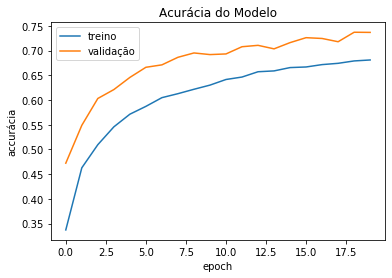

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Acurácia do Modelo')
plt.ylabel('accurácia')
plt.xlabel('epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

In [15]:
model.save('cifar_standard_dropout.h5')
saved_model = load_model('cifar_standard_dropout.h5')
saved_model.evaluate(x_test, y_test, verbose=0)

[8.524940720367432, 0.4588]

Ao adicionar o dropout, verificamos uma redução da acurácia de treinamento, estando a diferença entre esta e a validação menor, diminuindo consequentemente o overfitting. Esse valor pode ser aumentado ou reduzido para verificar melhorias do modelo.

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),padding='same'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.8))
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
#model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train/255, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_split=0.2,
          shuffle=True)

W0924 09:33:12.477115  9312 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0924 09:33:12.538952  9312 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 415s 10ms/step - loss: 1.9689 - acc: 0.2637 - val_loss: 1.8205 - val_acc: 0.3663
Epoch 2/20
40000/40000 [==============================] - 397s 10ms/step - loss: 1.7285 - acc: 0.3591 - val_loss: 1.6775 - val_acc: 0.4290
Epoch 3/20
40000/40000 [==============================] - 376s 9ms/step - loss: 1.6642 - acc: 0.3876 - val_loss: 1.6997 - val_acc: 0.4126
Epoch 4/20
40000/40000 [==============================] - 400s 10ms/step - loss: 1.6183 - acc: 0.4058 - val_loss: 1.6253 - val_acc: 0.4355
Epoch 5/20
40000/40000 [==============================] - 441s 11ms/step - loss: 1.5894 - acc: 0.4168 - val_loss: 1.5631 - val_acc: 0.4610
Epoch 6/20
40000/40000 [==============================] - 400s 10ms/step - loss: 1.5712 - acc: 0.4243 - val_loss: 1.6047 - val_acc: 0.4719
Epoch 7/20
40000/40000 [==============================] - 394s 10ms/step - loss: 1.5517 - acc: 0.4365 - val_loss: 1.5

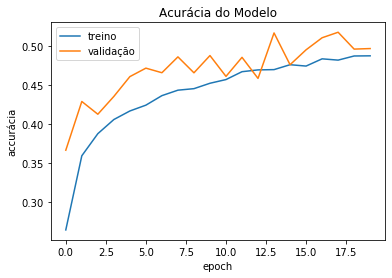

In [17]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Acurácia do Modelo')
plt.ylabel('accurácia')
plt.xlabel('epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

In [18]:
model.save('cifar_standard_dropout_plus.h5')
saved_model = load_model('cifar_standard_dropout_plus.h5')
saved_model.evaluate(x_test, y_test, verbose=0)

W0924 11:49:08.388106  9312 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0924 11:49:08.474881  9312 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


[10.896397784423828, 0.2786]

Alterando o dropout para 80, significando que apenas 20% dos neurônios serão utilizados, teremos uma acurácia de treino de 47.59% e validação 48.88%. Apesar do overfitting ser mínimo, o desempenho geral do modelo piorou consideravelmente devido a pequena quantidade de neurônios utilizados. Podemos então aumentar o parâmetro p e utilizar 80% dos neurônios.

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train/255, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 398s 10ms/step - loss: 1.6190 - acc: 0.4089 - val_loss: 1.2685 - val_acc: 0.5418
Epoch 2/20
40000/40000 [==============================] - 374s 9ms/step - loss: 1.2282 - acc: 0.5618 - val_loss: 1.0367 - val_acc: 0.6364
Epoch 3/20
40000/40000 [==============================] - 375s 9ms/step - loss: 1.0367 - acc: 0.6366 - val_loss: 1.0333 - val_acc: 0.6445
Epoch 4/20
40000/40000 [==============================] - 375s 9ms/step - loss: 0.9072 - acc: 0.6781 - val_loss: 0.8720 - val_acc: 0.6989
Epoch 5/20
40000/40000 [==============================] - 374s 9ms/step - loss: 0.8274 - acc: 0.7098 - val_loss: 0.8312 - val_acc: 0.7122
Epoch 6/20
40000/40000 [==============================] - 375s 9ms/step - loss: 0.7584 - acc: 0.7329 - val_loss: 0.8405 - val_acc: 0.7134
Epoch 7/20
40000/40000 [==============================] - 375s 9ms/step - loss: 0.7041 - acc: 0.7496 - val_loss: 0.7985 -

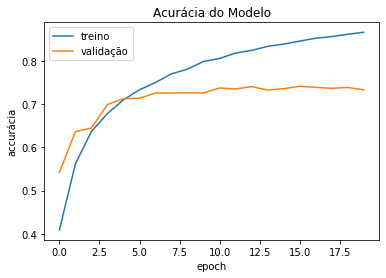

In [20]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Acurácia do Modelo')
plt.ylabel('accurácia')
plt.xlabel('epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

In [21]:
model.save('cifar_standard_dropout_min.h5')
saved_model = load_model('cifar_standard_dropout_min.h5')
saved_model.evaluate(x_test, y_test, verbose=0)

[6.367936749267578, 0.6001]

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(32,32,3),padding='same'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())
#model.add(Dropout(0.2))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D())
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train/255, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_split=0.2,
          shuffle=True)

W0924 13:55:11.388203  9312 deprecation_wrapper.py:119] From C:\Users\cecilia.silva\AppData\Local\Continuum\miniconda3\envs\vsoft_cecilia\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 425s 11ms/step - loss: 1.1951 - acc: 0.5780 - val_loss: 1.0337 - val_acc: 0.6307
Epoch 2/20
40000/40000 [==============================] - 425s 11ms/step - loss: 0.8091 - acc: 0.7184 - val_loss: 0.9353 - val_acc: 0.6709
Epoch 3/20
40000/40000 [==============================] - 427s 11ms/step - loss: 0.6467 - acc: 0.7747 - val_loss: 1.2728 - val_acc: 0.6095
Epoch 4/20
40000/40000 [==============================] - 459s 11ms/step - loss: 0.5189 - acc: 0.8195 - val_loss: 0.7782 - val_acc: 0.7407
Epoch 5/20
40000/40000 [==============================] - 438s 11ms/step - loss: 0.3847 - acc: 0.8680 - val_loss: 0.9525 - val_acc: 0.7073
Epoch 6/20
40000/40000 [==============================] - 451s 11ms/step - loss: 0.2852 - acc: 0.9017 - val_loss: 0.8544 - val_acc: 0.7372
Epoch 7/20
40000/40000 [==============================] - 440s 11ms/step - loss: 0.2018 - acc: 0.9325 - val_loss: 0.

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Acurácia do Modelo')
plt.ylabel('accurácia')
plt.xlabel('epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

In [ ]:
model.save('cifar_standard_batchnorm.h5')
saved_model = load_model('cifar_standard_batchnorm.h5')
saved_model.evaluate(x_test, y_test, verbose=0)